In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
pos=[(0,0,0), (0,0,1), (0,0,2),(0,1,0), (0,1,1), (0,1,2),(0,2,0), (0,2,1), (0,2,2),#
    (1,0,0), (1,0,1), (1,0,2),(1,1,0), (1,1,1), (1,1,2),(1,2,0), (1,2,1), (1,2,2),#
    (2,0,0), (2,0,1), (2,0,2),(2,1,0), (2,1,1), (2,1,2),(2,2,0), (2,2,1), (2,2,2),#
    (3,0,0), (3,0,1), (3,0,2),(3,1,0), (3,1,1), (3,1,2),(3,2,0), (3,2,1), (3,2,2),#
    (4,0,0), (4,0,1), (4,0,2),(4,1,0), (4,1,1), (4,1,2),(4,2,0), (4,2,1), (4,2,2)#
    ]
nodePos=["red","red","red","red","red","red","red","red","red",#
    "gray","gray","gray","gray","gray","gray","gray","gray","gray",#
    "gray","gray","gray","gray","gray","gray","gray","gray","gray",#
    "gray","gray","gray","gray","gray","gray","gray","gray","gray",#
    "green","green","green","green","green","green","green","green","green"#
    ]

In [3]:
F=nx.Graph()
F.add_nodes_from(pos)
i=0
end=0
start=0
for u in F.nodes():
    F.nodes[u]["pos"]=u
    i+=1
F.add_edges_from(nx.geometric_edges(F, 1))
for (u,v) in F.edges():
    if (u[0]==0) and (v[0]!=0):
        F.edges[u,v]['row']="red"
        start+=1

    elif (v[0]==4) and (u[0]!=4):
        F.edges[u,v]['row']="green"
        end+=1
    else:
        F.edges[u,v]['row']="darkgray"

colors=np.array(list(nx.get_edge_attributes(F,"row").values()))

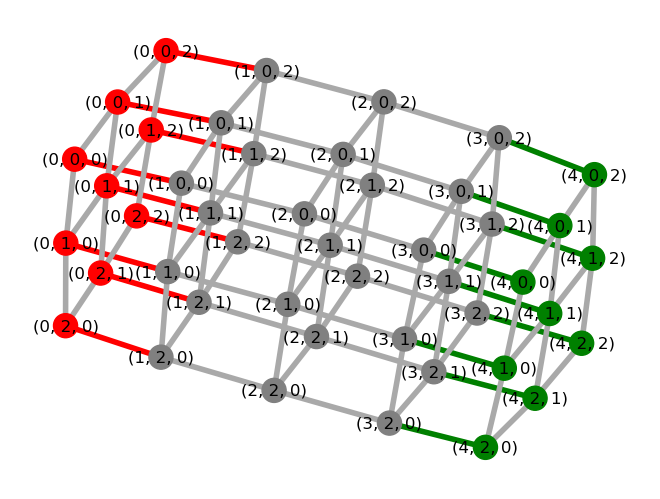

In [4]:
options = {
    "node_color": nodePos,
    "edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
}
nx.draw(F,nx.spring_layout(F, seed=63), **options)

## Ab hier wird der Filter analog zum Solver verwendet
Zuerst werden die Filter für die relevanten Edges erstellt und dann die relevanten Werte aus den colors-Vektor gezogen. Der colors-Vektor entspricht meinem currents-Vektor im Solver.

In [5]:
lowXEnd=np.array(F.edges())[:,:,0]==np.min(np.array(F.nodes())[:,0])
lowFilter=np.logical_xor(lowXEnd[:,0],lowXEnd[:,1])
total_IN=colors[lowFilter]

In [6]:
highXEnd=np.array(F.edges())[:,:,0]==np.max(np.array(F.nodes())[:,0])
highFilter=np.logical_xor(highXEnd[:,0],highXEnd[:,1])
total_OUT=colors[highFilter]

In [7]:
print(total_IN)
print("von ", start," gefunden: ",len(total_IN))

['red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red']
von  9  gefunden:  9


In [8]:
print(total_OUT)
print("von ", end, " gefunden: ",len(total_OUT))

['green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green']
von  9  gefunden:  9


#### So hätte das Array ungefiltert ausgesehen

In [9]:
colors

array(['darkgray', 'darkgray', 'red', 'darkgray', 'darkgray', 'red',
       'darkgray', 'red', 'darkgray', 'darkgray', 'red', 'darkgray',
       'darkgray', 'red', 'darkgray', 'red', 'darkgray', 'red',
       'darkgray', 'red', 'red', 'darkgray', 'darkgray', 'darkgray',
       'darkgray', 'darkgray', 'darkgray', 'darkgray', 'darkgray',
       'darkgray', 'darkgray', 'darkgray', 'darkgray', 'darkgray',
       'darkgray', 'darkgray', 'darkgray', 'darkgray', 'darkgray',
       'darkgray', 'darkgray', 'darkgray', 'darkgray', 'darkgray',
       'darkgray', 'darkgray', 'darkgray', 'darkgray', 'darkgray',
       'darkgray', 'darkgray', 'darkgray', 'darkgray', 'darkgray',
       'darkgray', 'darkgray', 'darkgray', 'darkgray', 'darkgray',
       'darkgray', 'darkgray', 'darkgray', 'darkgray', 'darkgray',
       'darkgray', 'green', 'darkgray', 'darkgray', 'green', 'darkgray',
       'green', 'darkgray', 'darkgray', 'green', 'darkgray', 'darkgray',
       'green', 'darkgray', 'green', 'darkgray'